In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
Base.classes.keys()

['measurement', 'station']

In [10]:
session = Session(engine)

In [11]:
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')

In [13]:
columns = inspector.get_columns('station')

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(func.count(Measurement.date)).all()

[(19550)]

In [15]:
# Calculate the date 1 year ago from the last data point in the database
earliest = session.query(Measurement.date).order_by(Measurement.date).first()
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Earliest: {earliest[0]} , Latest: {latest[0]}")

Earliest: 2010-01-01 , Latest: 2017-08-23


In [16]:
lat_dt = dt.datetime.strptime(latest[0], '%Y-%m-%d')
query_dt = dt.date(lat_dt.year -1, lat_dt.month, lat_dt.day)
query_dt

datetime.date(2016, 8, 23)

In [17]:
# Perform a query to retrieve the data and precipitation scores
s= [Measurement.date,Measurement.prcp]
queryoutcome = session.query(*s).filter(Measurement.date >= query_dt).all()


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_pd= pd.DataFrame(queryoutcome, columns=['Date','Precipitation'])

precip_pd = precip_pd.sort_values(["Date"], ascending=True)
precip_pd = precip_pd.set_index("Date")
precip_pd=precip_pd.dropna(how="any")
precip_pd.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


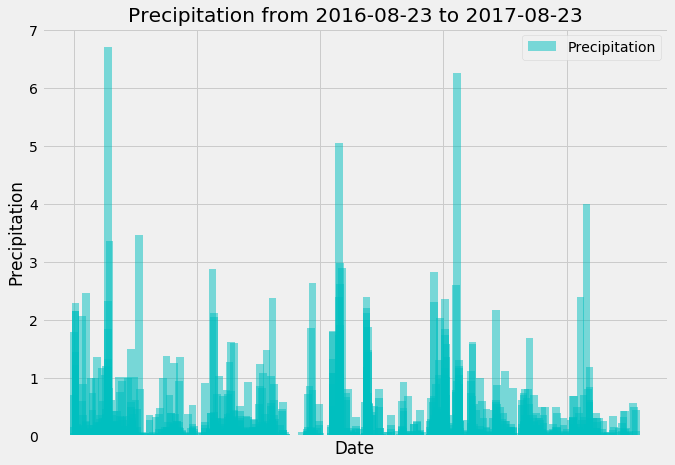

In [19]:
#Plot the results using the DataFrame `plot` method.
x = precip_pd.index.tolist()
y = precip_pd['Precipitation']

plt.figure(figsize=(10,7))
plt.bar(x,y,width = 5 ,color='c', alpha=0.5, align="center",label='Precipitation')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
ticks = np.arange(0,400,80)
plt.xticks(ticks)

plt.title("Precipitation from 2016-08-23 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_pd.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
#showing more work for statistics
precip_pd.mean()

Precipitation    0.177279
dtype: float64

In [22]:
precip_pd.median()

Precipitation    0.02
dtype: float64

In [23]:
precip_pd.mode()

,Precipitation
0,0.0


In [24]:
precip_pd.quantile([0.25,0.5,0.75])

,Precipitation
0.25,0.00
0.50,0.02
0.75,0.13


In [25]:
precip_pd.min()

Precipitation    0.0
dtype: float64

In [26]:
precip_pd.max()

Precipitation    6.7
dtype: float64

In [29]:
# Design a query to show how many stations are available in this dataset?
s_col = inspector.get_columns('station')
for col in s_col:
    pk = ""
    if col['primary_key'] == 1:
        pk = "Primary Key"
    print(col["name"], col["type"], pk)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


In [30]:
session.query(Station.id).count() 

9

In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(func.count(Measurement.station)).all()

[(19550)]

In [90]:
station_order=Measurement.station, func.count(Measurement.id)
station_order

(<sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f80b4936b30>,
 <sqlalchemy.sql.functions.count at 0x7f80b713a490; count>)

In [93]:
#Most active stations in desc order
group_orderby = session.query(*station_order).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

In [94]:
group_orderby

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [106]:
#Lowest. highest, average temp using func. min, func.max, and func.avg
r=[(func.min(Measurement.tobs)),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
session.query(*r).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()

(54.0, 85.0, 71.66378066378067)

In [97]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
